# Exercício Computacional 1 - Operadores Nebulosos

In [1]:
import skfuzzy as fuzz
import numpy as np
from matplotlib import pyplot as plt
from math import *

In [64]:
def trimf(x,a,b,c):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = max([min([(x[i]-a)/(b-a), (c-x[i])/(c-b)]), 0])
    return y

def gaussmf(x,c,sigma):
    return e**(-1/2 * ((x-c)/sigma)**2)

def trapmf(x,a,b,c,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > a and x[i] <= b:
            y[i] = (x[i]-a)/(b-a)
        if x[i] > b and x[i] <= c:
            y[i] = 1
        if x[i] > c and x[i] < d:
            y[i] = (-x[i]+d)/(-c+d)
    return y

def gbellmf(x, a, b, c):
    return 1/(1+abs(((x-c)/a)**(2*b)))

def sigmf(x, c, a):
    return 1/(1 + e**(-a*(x-c)))
    

## 1 -  Complemento Nebuloso
Implemente os operadores de complemento nebuloso: Zadeh, Yager e Sugeno. Escolha uma função de pertinência e efetue as operações. Plote da função de pertinência e dos complementos em relação “x”. Plote os gráficos dos complementos em relação à função escolhida.

### Zadeh
$N(a) = 1-a$

In [3]:
def zadeh(a):
    N_a = 1 - a
    return N_a

In [4]:
def plot(x, y, N_x, N_y):
    # Plote da função de pertinência e dos complementos em relação “x”.
    plt.figure()
    plt.plot(x, x, 'g-', x, y, 'b-', x, N_x,'r-')
    plt.title("Função de pertinência e complemento em relação “x”")
    plt.grid()
    legend = plt.legend([r'$x$', r'$y$', r'$N(x)$'])

    # Função de pertinência e complemento.
    plt.figure()
    plt.plot(x, y, 'b-', x, N_y,'r-')
    plt.title("Função de pertinência e complemento")
    plt.grid()
    legend = plt.legend([r'$y$', r'$N(y)$'])

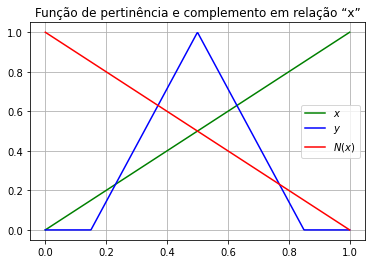

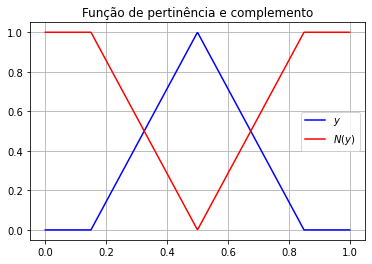

In [5]:
x = np.linspace(0, 1, 500)
y = trimf(x, 0.15, 0.5, 0.85)
N_x = zadeh(x)
N_y = zadeh(y)
plot(x, y, N_x, N_y)

### Yager
$(1-a^w)^{\frac{1}{w}} \text{  tal que  } w \in (0, inf)$

In [6]:
def yager(a, w):
    N_a = None
    if w > 0:
        N_a = (1.0 - a**w)**(1.0/w)
    return N_a

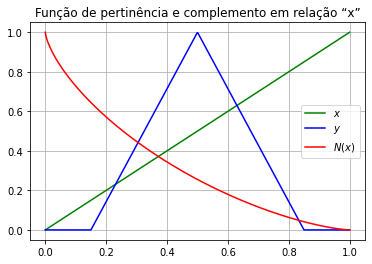

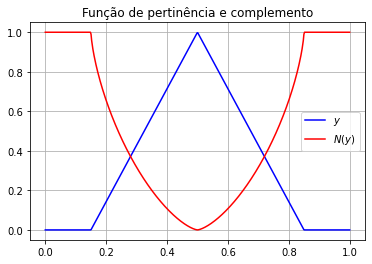

In [7]:
x = np.linspace(0, 1, 500)
y = trimf(x, 0.15, 0.5, 0.85)
N_x = yager(x, 0.7)
N_y = yager(y, 0.7)
plot(x, y, N_x, N_y)

### Sugeno
${\frac{1-a}{a+sa}} \text{  tal que  } s \in (-1, inf)$

In [8]:
def sugeno(a, s):
    if s <= -1:
        return None
    N_a = (1-a)/(1+s*a)
    return N_a

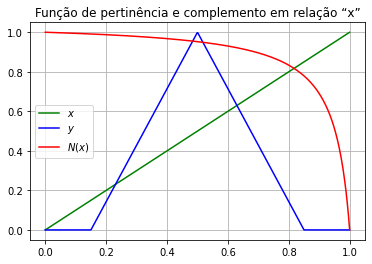

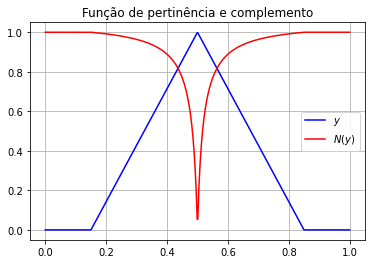

In [9]:
x = np.linspace(0, 1, 500)
y = trimf(x, 0.15, 0.5, 0.85)
N_x = sugeno(x, -0.95)
N_y = sugeno(y, -0.95)
plot(x, y, N_x, N_y)

## 2 -  União Nebulosa
Implemente os operadores de união nebulosa: máximo, soma probabilística, soma limitada e soma drástica. Escolha duas funções de pertinência e efetue as operações. Plotar os gráficos da função e dos operadores em relação a "x”.

In [40]:
def plot2(x, y1, y2, S1, S2):
    # Plote da função de pertinência e dos complementos em relação “x”.
    plt.figure()
    plt.plot(x, x, 'g-', x, y1, 'b-', x, y2,'r-')
    plt.title("Funções de pertinência em relação “x”")
    plt.grid()
    legend = plt.legend([r'$x$', r'$y1$', r'$y2$'])

    # Função de pertinência e complemento.
    plt.figure()
    plt.plot(x, S1, 'b-', x, S2,'r-')
    plt.title("União entre cada função de pertinência e 'x'")
    plt.grid()
    legend = plt.legend([r'$S(x, y1)$', r'$S(x, y2)$'])

### Máximo
$S(a, b) = max(a, b)$

In [41]:
def maximum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(max(a_i, b_i))
    return np.array(S)

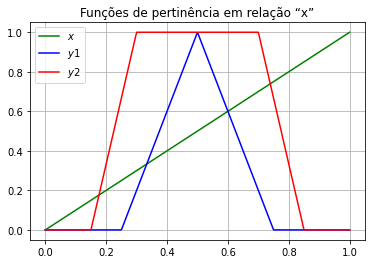

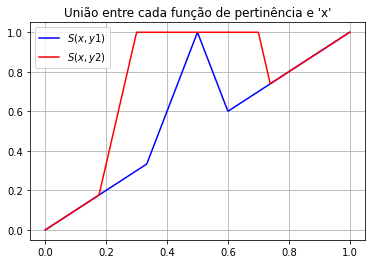

In [50]:
x = np.linspace(0, 1, 500)
y1 = trimf(x, 0.25, 0.5, 0.75)
y2 = trapmf(x, 0.15, 0.3, 0.7, 0.85)
S1 = maximum(x, y1)
S2 = maximum(x, y2)
plot2(x, y1, y2, S1, S2)

### Soma Probabilística
$S(a, b) = a + b - ab$

In [43]:
def probabilistic_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(a_i + b_i - a_i*b_i)
    return np.array(S)

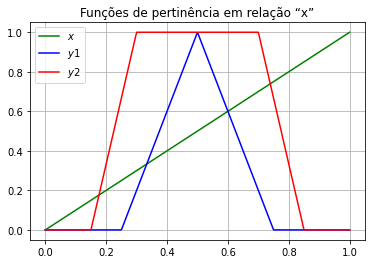

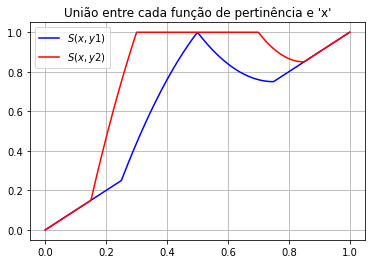

In [51]:
x = np.linspace(0, 1, 500)
y1 = trimf(x, 0.25, 0.5, 0.75)
y2 = trapmf(x, 0.15, 0.3, 0.7, 0.85)
S1 = probabilistic_sum(x, y1)
S2 = probabilistic_sum(x, y2)
plot2(x, y1, y2, S1, S2)

### Soma Limitada
$S(a, b) = min(1, a + b)$

In [45]:
def limited_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(min(1, a_i + b_i))
    return np.array(S)

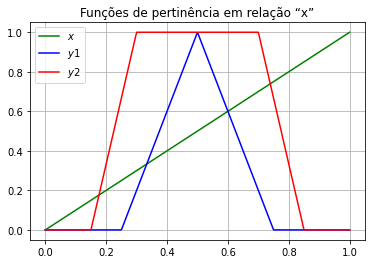

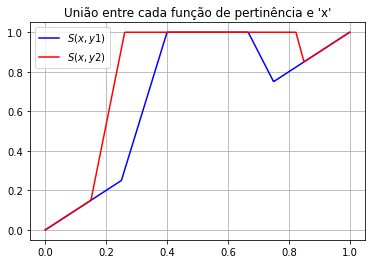

In [52]:
x = np.linspace(0, 1, 500)
y1 = trimf(x, 0.25, 0.5, 0.75)
y2 = trapmf(x, 0.15, 0.3, 0.7, 0.85)
S1 = limited_sum(x, y1)
S2 = limited_sum(x, y2)
plot2(x, y1, y2, S1, S2)

### Soma Drástica
       
       S = a, se b = 0 
           b, se a = 0 
           1, caso contrário


In [47]:
def drastic_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        if b_i == 0:
            S.append(a_i)
        elif a_i == 0:
            S.append(b_i)
        else:
            S.append(1)
    return np.array(S)

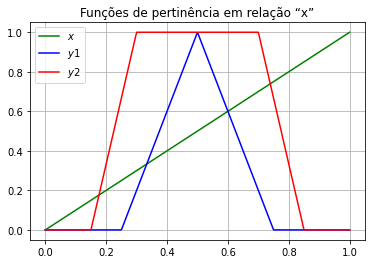

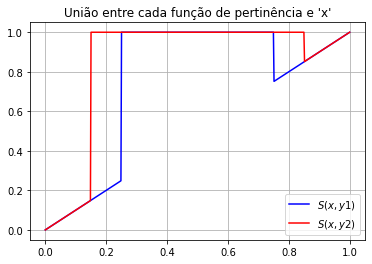

In [53]:
x = np.linspace(0, 1, 500)
y1 = trimf(x, 0.25, 0.5, 0.75)
y2 = trapmf(x, 0.15, 0.3, 0.7, 0.85)
S1 = drastic_sum(x, y1)
S2 = drastic_sum(x, y2)
plot2(x, y1, y2, S1, S2)

## 3 -  Interseção Nebulosa
Implemente os interseção nebulosa: mínimo, produto algébrico, produto limitado e produto drástico. Escolha duas funções de pertinência e efetue as operações. Plotar os gráficos da função e dos operadores em relação a “x”

In [83]:
def plot3(x, y1, y2, T1, T2):
    # Plote da função de pertinência e dos complementos em relação “x”.
    plt.figure()
    plt.plot(x, x, 'g-', x, y1, 'b-', x, y2,'r-')
    plt.title("Funções de pertinência em relação “x”")
    plt.grid()
    legend = plt.legend([r'$x$', r'$y1$', r'$y2$'])

    # Função de pertinência e complemento.
    plt.figure()
    plt.plot(x, T1, 'b-', x, T2,'r-')
    plt.title("Interseção entre cada função de pertinência e 'x'")
    plt.grid()
    legend = plt.legend([r'$T(x, y1)$', r'$T(x, y2)$'])

### Mínimo

$T(a, b) = min(a, b)$

In [84]:
def minimum(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        T.append(min(a_i, b_i))
    return np.array(T)

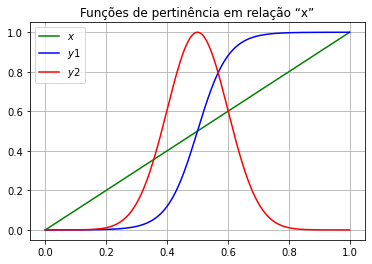

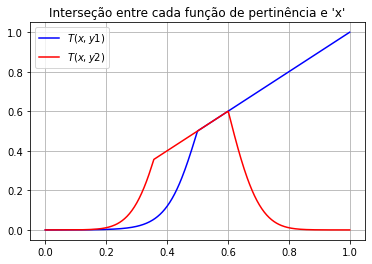

In [86]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T1 = minimum(x, y1)
T2 = minimum(x, y2)
plot3(x, y1, y2, T1, T2)

### Produto

$T(a, b) = ab$

In [81]:
def product(a, b):
    T = a*b
    return T

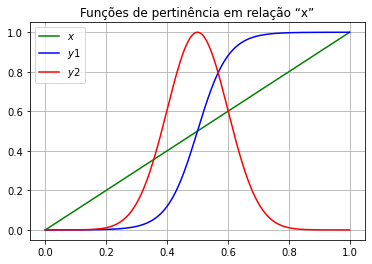

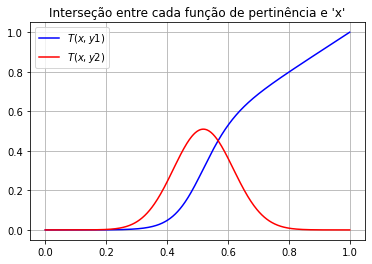

In [87]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T1 = product(x, y1)
T2 = product(x, y2)
plot3(x, y1, y2, T1, T2)

### Produto Limitado

$T(a, b) = max(0, a + b - 1)$

In [78]:
def limited_product(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        T.append(max(0, a_i + b_i - 1))
    return np.array(T)

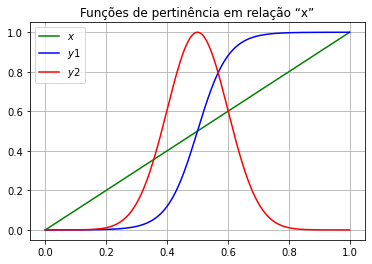

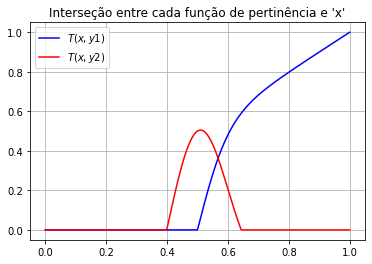

In [89]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T1 = limited_product(x, y1)
T2 = limited_product(x, y2)
plot3(x, y1, y2, T1, T2)

### Produto Drástico
       
       T = a, se b = 1 
           b, se a = 1 
           0, caso contrário


In [92]:
def drastic_product(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        if b_i == 1:
            T.append(a_i)
        elif a_i == 1:
            T.append(b_i)
        else:
            T.append(0)
    return np.array(T)

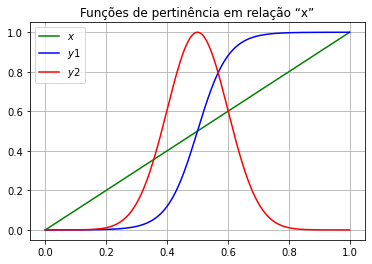

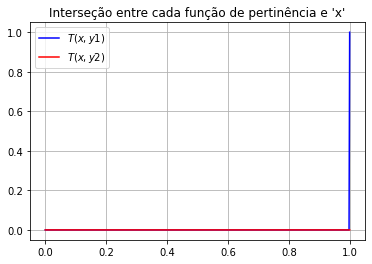

In [93]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T1 = drastic_product(x, y1)
T2 = drastic_product(x, y2)
plot3(x, y1, y2, T1, T2)